## Diabetes prediction using K-NN model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn

### Read the Diabetes data

In [18]:
# Read and show data
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Create training data

In [21]:
features = np.array(diabetes.drop(["Outcome"], 1))
targets = np.array(diabetes["Outcome"])

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=1234)

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_24660\3047324784.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = np.array(diabetes.drop(["Outcome"], 1))


### Create and train the model

In [36]:
# Create K-N model
diabetes_model = KNeighborsClassifier(n_neighbors=5)

# Train model
diabetes_model.fit(x_train, y_train)

KNeighborsClassifier()

### Accuracy of model

In [38]:
accuracy = diabetes_model.score(x_test, y_test)
accuracy.round(2)

0.73

### Find the confusion matrix

Text(69.0, 0.5, 'Truth')

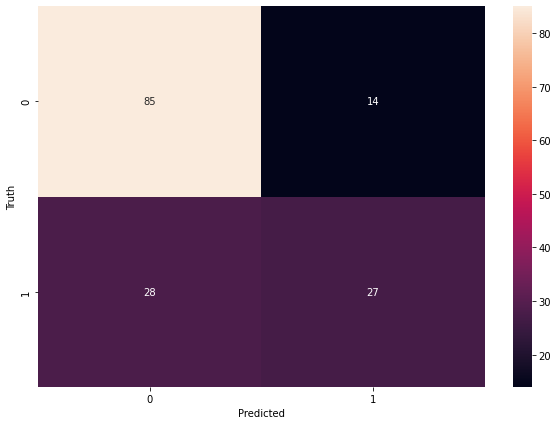

In [39]:
from sklearn.metrics import confusion_matrix

predicted = diabetes_model.predict(x_test)
cm = confusion_matrix(y_test, predicted)

# Make it a little bit bigger
plt.figure(figsize=(10,7))

# Plot by seaborn
sn.heatmap(cm, annot=True)

# Add axis labels
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Find the best value of K

Maximum accuracy:  0.77 at K = 5


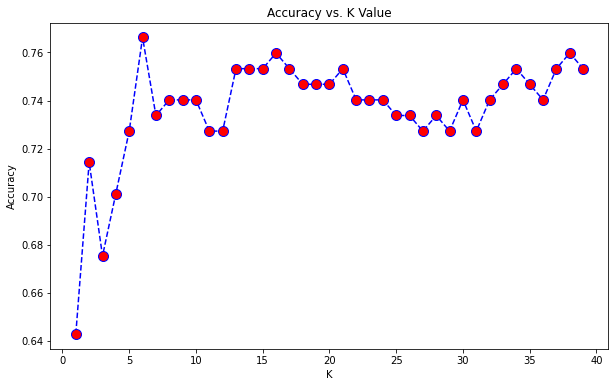

In [35]:
error_rate = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error_rate.append(model.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(error_rate).round(2),"at K =",error_rate.index(max(error_rate)))